### **EDA-1**
### Title: Bike Details Dataset
### Source:
The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.
### Description:
The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market.

### Title: Bike Details Dataset
•	=name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio").

•	selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000).

•	year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015).

•	seller_type: Seller category, either "Individual" or "Dealer" (Categorical).

•	owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical).

•	km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000).

•	ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

In [9]:
# 1. What is the range of selling prices in the dataset?
max_price = df['selling_price'].max()
min_price = df['selling_price'].min()
price_range = max_price - min_price
print(f"Range of Selling Prices: ₹{price_range}")


Range of Selling Prices: ₹755000


In [11]:
# 2. What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
print(f"Median Selling Price: ₹{median_price}")

Median Selling Price: ₹45000.0


In [13]:
# 3. What is the most common seller type?
common_seller_type = df['seller_type'].mode()[0]
print(f"Most Common Seller Type: {common_seller_type}")

Most Common Seller Type: Individual


In [15]:
# 4. How many bikes have driven more than 50,000 kilometers?
bikes_above_50k = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes Driven > 50,000 km: {bikes_above_50k}")

Bikes Driven > 50,000 km: 170


In [17]:
# 5. What is the average km_driven value for each ownership type?
avg_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by Ownership Type:")
print(avg_km_driven_by_owner)

Average km_driven by Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [19]:
# 6. What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / df.shape[0]
print(f"Proportion of Bikes from 2015 or Older: {proportion_2015_or_older:.2%}")

Proportion of Bikes from 2015 or Older: 56.64%


In [21]:
# 7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("Missing Values Trend:")
print(missing_values)

Missing Values Trend:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [23]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax(), 'name']
print(f"Highest ex_showroom_price: ₹{highest_ex_showroom_price} (Bike: {bike_with_highest_ex_showroom_price})")


Highest ex_showroom_price: ₹1278000.0 (Bike: Harley-Davidson Street Bob)


In [25]:
# 9. What is the total number of bikes listed by each seller type?
bikes_by_seller_type = df['seller_type'].value_counts()
print("Bikes Listed by Seller Type:")
print(bikes_by_seller_type)

Bikes Listed by Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [27]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == '1st owner']
correlation_first_owner = first_owner_bikes[['selling_price', 'km_driven']].corr().iloc[0, 1]
print(f"Correlation (selling_price vs km_driven) for 1st Owner Bikes: {correlation_first_owner:.2f}")


Correlation (selling_price vs km_driven) for 1st Owner Bikes: -0.24


In [29]:
# 11. Identify and remove outliers in the km_driven column using the IQR method
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_removed = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
outliers_removed_count = df.shape[0] - outliers_removed.shape[0]
print(f"Outliers Removed in km_driven: {outliers_removed_count}")


Outliers Removed in km_driven: 39


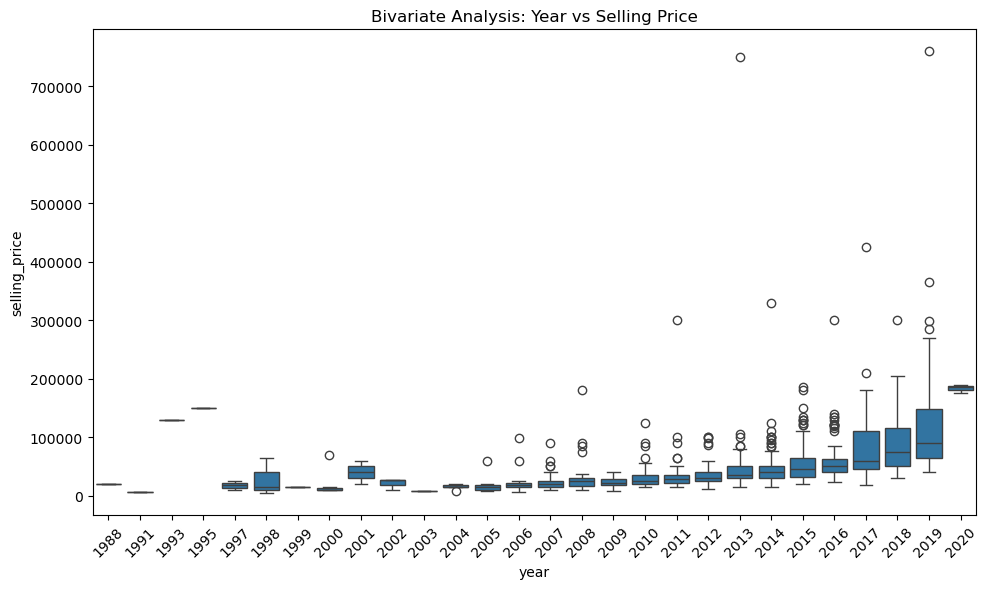

In [31]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Bivariate Analysis: Year vs Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# 13. What is the average depreciation in selling price based on the bike's age?
current_year = 2024
df['age'] = current_year - df['year']
average_depreciation = df['selling_price'].mean() / df['age'].mean()
print(f"Average Depreciation per Year: ₹{average_depreciation:,.2f}")

Average Depreciation per Year: ₹5,885.60


In [35]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
avg_price_by_year = df.groupby('year')['selling_price'].mean()
significantly_above_avg = df[df.apply(lambda row: row['selling_price'] > 1.5 * avg_price_by_year[row['year']], axis=1)]
print("Bikes Priced Above Average for Their Year:")
print(significantly_above_avg[['name', 'year', 'selling_price']])


Bikes Priced Above Average for Their Year:
                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


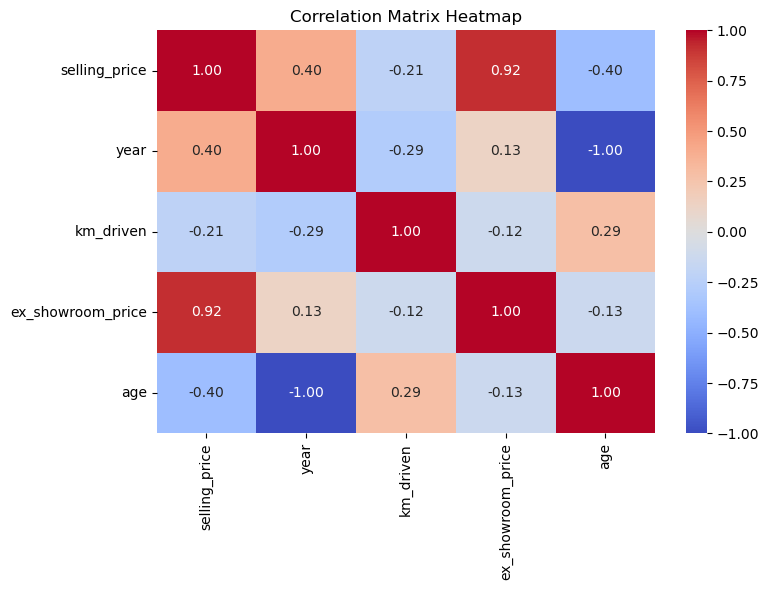

In [37]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


### EDA - 2
### About - Dataset:

The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and consumer behavior.

### Title: Car Sale Dataset

Source:
The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

Description:
The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, and understanding customer preferences.

### Features:

* Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.
 
 * Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.
 
 * Customer Name: The name of the customer who purchased the car, represented as a string.
 
 * Gender: The gender of the customer, categorized as "Male" or "Female.
 
 * Annual Income: The customer's annual income in US dollars, represented as a numeric value.
 
 * Dealer_Name: The name of the dealership selling the car, represented as a string.
 
 * Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.
 
 * Model: The specific model name of the car, such as "Corolla," "Civic," etc.
 
 * Engine: The engine type of the car, such as "V6," "I4," etc.
 
 * Transmission: The type of transmission in the car, either "Manual" or "Automatic
 Color: The color of the car, represented as a string (e.g., "Red," "Blue").
 
 * Price ($): The selling price of the car in US dollars.
 
* Dealer_No: A unique identifier for each car dealer in the dataset.
 
 * Body Style: The body style of the car, such as "Sedan," "SUV," etc.
 
* Phone: The phone number of the customer who purchased the car.

 * Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.



In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Car Sale.csv")

In [45]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print("Average Selling Price by Dealer:")
print(avg_price_by_dealer)

Average Selling Price by Dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.88

In [47]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_by_company = df.groupby('Company')['Price ($)'].std().idxmax()
highest_variation = df.groupby('Company')['Price ($)'].std().max()
print(f"Car Brand with Highest Price Variation: {price_variation_by_company} (Std Dev: {highest_variation})")


Car Brand with Highest Price Variation: Lincoln (Std Dev: 19658.050211265567)


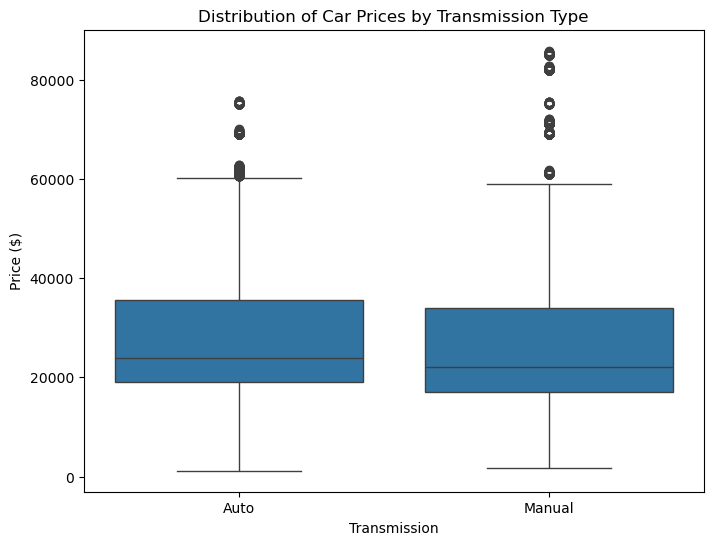

In [49]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

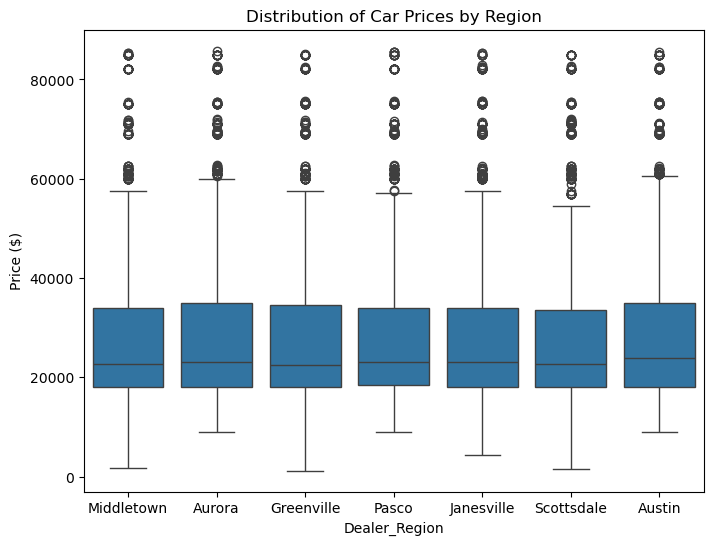

In [51]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Distribution of Car Prices by Region')
plt.show()

In [53]:
# 5. What is the distribution of cars based on body styles?
body_style_distribution = df['Body Style'].value_counts()
print("Distribution of Cars by Body Style:")
print(body_style_distribution)

Distribution of Cars by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [219]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender = df.groupby('Gender')['Price ($)'].mean()
avg_price_by_income = df.groupby(pd.cut(df['Annual Income'], bins=5))['Price ($)'].mean()
print("Average Selling Price by Gender:")
print(avg_price_by_gender)
print("Average Selling Price by Income Bracket:")
print(avg_price_by_income)

Average Selling Price by Gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64
Average Selling Price by Income Bracket:
Annual Income
(-1109.92, 2248064.0]      28044.351311
(2248064.0, 4486048.0]     29211.227862
(4486048.0, 6724032.0]     27736.745763
(6724032.0, 8962016.0]     40333.333333
(8962016.0, 11200000.0]    26001.000000
Name: Price ($), dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_6632\3458271569.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby(pd.cut(df['Annual Income'], bins=5))['Price ($)'].mean()


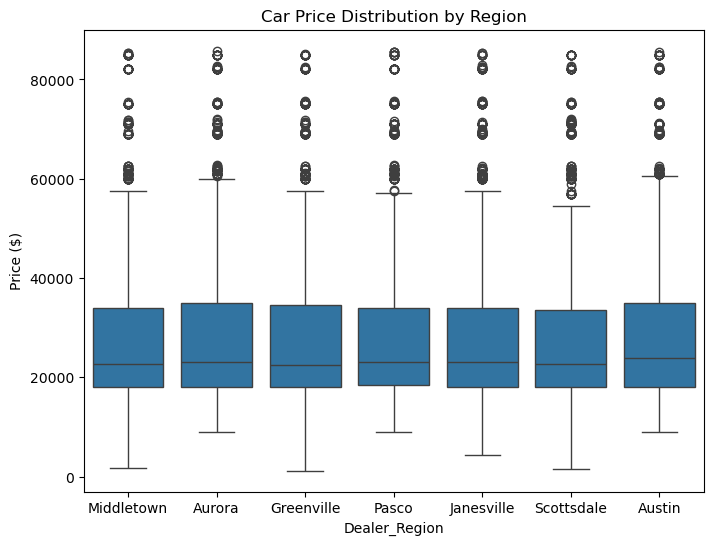

Number of Cars Sold by Region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


In [221]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
car_sales_by_region = df['Dealer_Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Car Price Distribution by Region')
plt.show()
print("Number of Cars Sold by Region:")
print(car_sales_by_region)


In [61]:
# 8. How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()
print("Average Car Price by Engine Size:")
print(avg_price_by_engine)

Average Car Price by Engine Size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


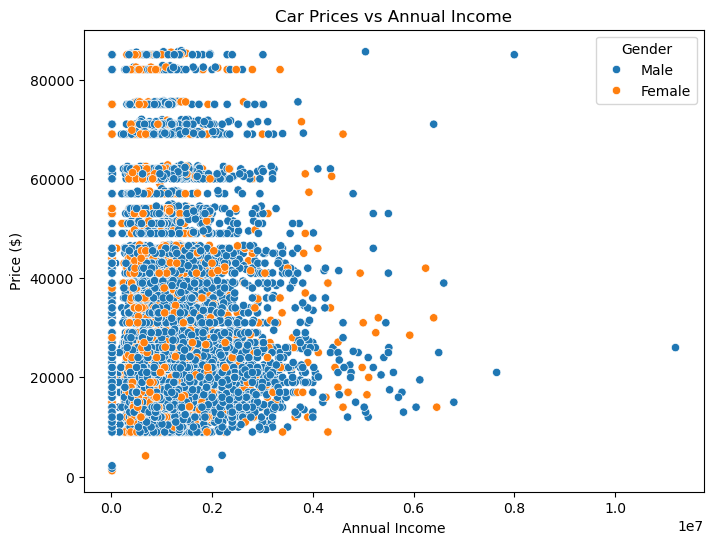

In [63]:
# 9. How do car prices vary based on the customer’s annual income bracket?
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Gender')
plt.title('Car Prices vs Annual Income')
plt.show()

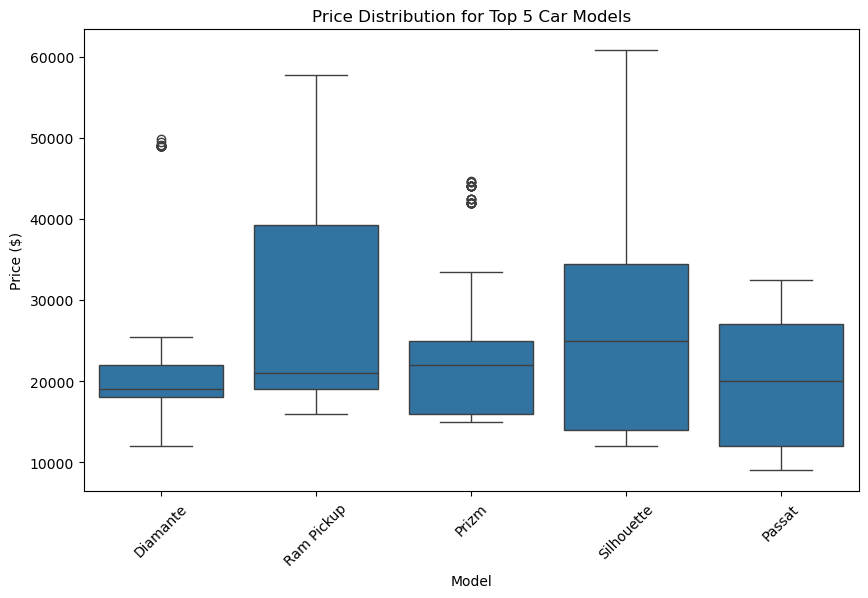

In [65]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df['Model'].value_counts().head(5).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['Model'].isin(top_5_models)], x='Model', y='Price ($)')
plt.title('Price Distribution for Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()


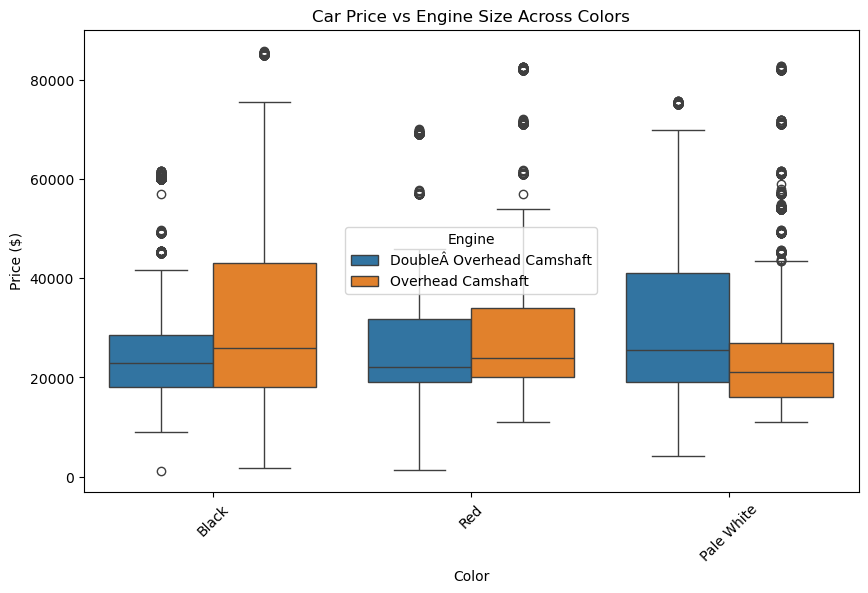

Color with Highest Price Variation: Red (Std Dev: 15519.360962404155)


In [67]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.title('Car Price vs Engine Size Across Colors')
plt.xticks(rotation=45)
plt.show()
color_price_variation = df.groupby('Color')['Price ($)'].std().idxmax()
highest_color_variation = df.groupby('Color')['Price ($)'].std().max()
print(f"Color with Highest Price Variation: {color_price_variation} (Std Dev: {highest_color_variation})")


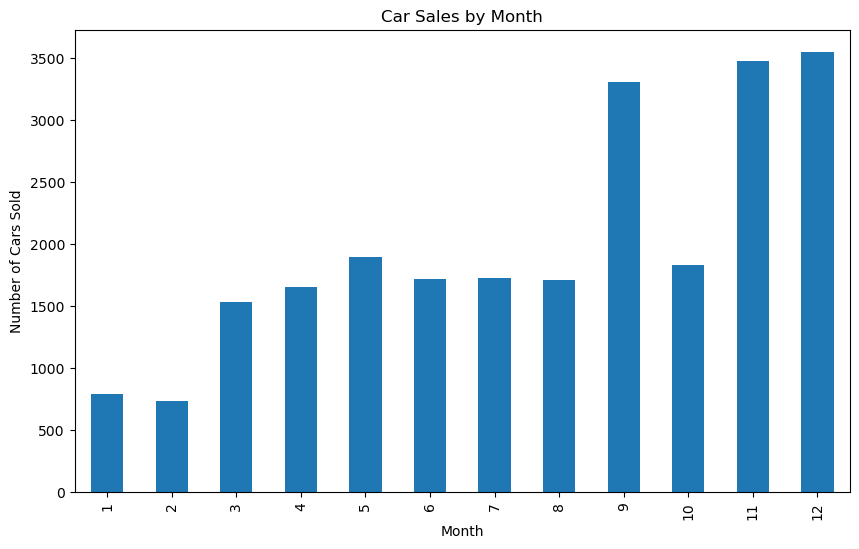

In [69]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month').size()
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

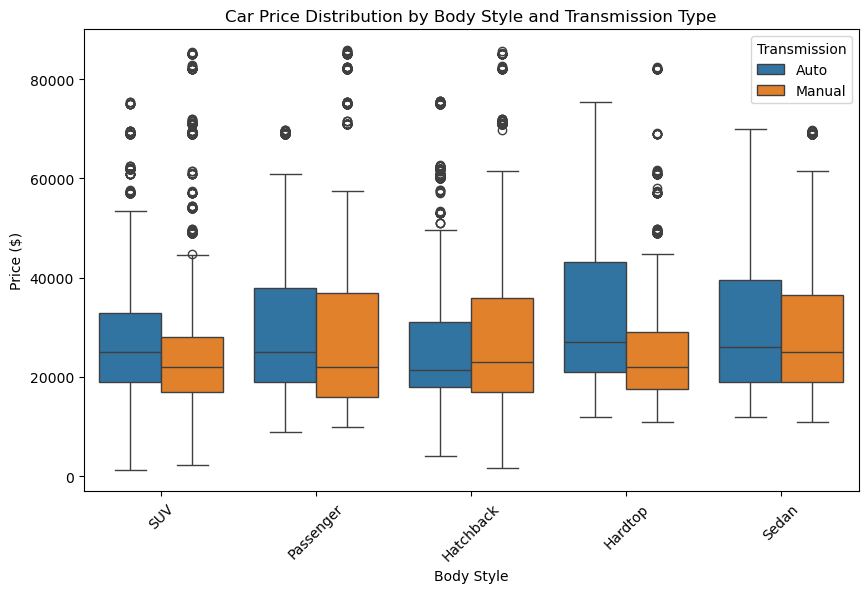

In [71]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.show()


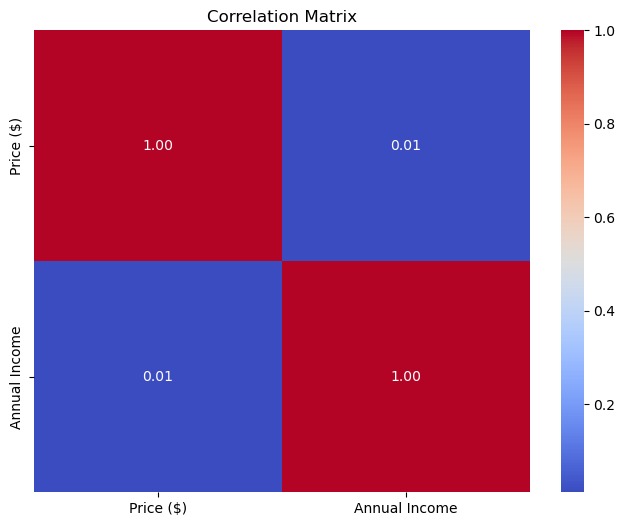

In [73]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
correlation_matrix = df[['Price ($)', 'Annual Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [75]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Average Car Price by Model and Engine Type:")
print(avg_price_by_model_engine)


Average Car Price by Model and Engine Type:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


### **EDA-3**
### Amazon Sales Data
Description:
This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

### Features:
* product_id: Unique identifier for each product

* product_name: Name of the product

* category: Category of the product

* discounted_price: Discounted price of the product

* actual_price: Actual price of the product

* discount_percentage: Percentage of discount for the product

* rating: Rating of the product (1-5)

* rating_count: Number of people who voted for the Amazon rating

* about_product: Description about the product

* user_id: ID of the user who wrote the review

* user_name: Name of the user who wrote the review

* review_id: ID of the user review

* review_title: Short review

* review_content: Long review

* img_link: Image link of the product

* product_link: Official website link of the product


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Amazon Sales Data.csv")

In [146]:
# 1. What is the average rating for each product category?
#avg_rating_by_category = df.groupby('category')['rating'].mean()
#print("Average Rating by Category:")
#print(avg_rating_by_category)

# Ensure that the 'rating' column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # 'coerce' will convert invalid values to NaN

# Now, compute the average rating by category
avg_rating_by_category = df.groupby('category')['rating'].mean()

# Display the result
print("Average Rating by Category:")
print(avg_rating_by_category)


Average Rating by Category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stati

In [149]:
# 2. What are the top rating_count products by category?
top_rated_products = df.sort_values(by='rating_count', ascending=False).groupby('category').head(1)
print("Top Rating Count Products by Category:")
print(top_rated_products[['category', 'product_name', 'rating_count']])


Top Rating Count Products by Category:
                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
1272  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...   
...                                                 ...   
1375  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   
1422  Home&Kitchen|Heating,Cooling&AirQuality|Parts&...   
1439  Home&Kitchen|Heating,Cooling&AirQuality|Fans|P...   
1444  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   

                                           product_name  rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0  
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0  
1059  Pigeon 1.5 litre Hot Kettle an

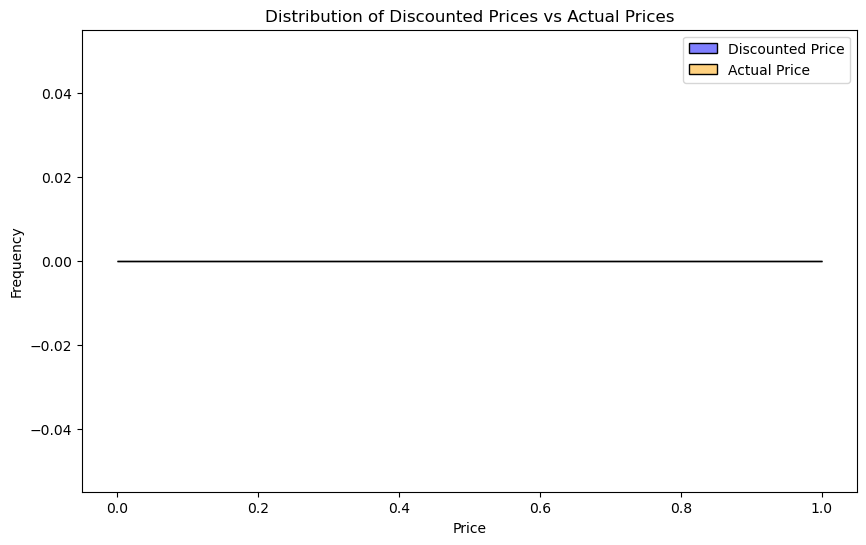

In [152]:
# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True)
sns.histplot(df['actual_price'], color='orange', label='Actual Price', kde=True)
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [155]:
# 4. How does the average discount percentage vary across categories?
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print("Average Discount Percentage by Category:")
print(avg_discount_by_category)


Average Discount Percentage by Category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSup

In [158]:
# 5. What are the most popular product names?
popular_products = df['product_name'].value_counts().head(5)
print("Most Popular Product Names:")
print(popular_products)

Most Popular Product Names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                                   3
Pinnaclz Original Combo of 2 Micro USB Fast Charging Cable, USB Charging Cable for Data Transfer Perfect for Android Smart Phones White 1.2 Meter Made in India (Pack of 2)                          3
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Qu

In [161]:
# 6. What are the most popular product keywords?
df['keywords'] = df['product_name'].str.split()
all_keywords = pd.Series([word for keywords in df['keywords'] for word in keywords])
most_common_keywords = all_keywords.value_counts().head(10)
print("Most Popular Product Keywords:")
print(most_common_keywords)

Most Popular Product Keywords:
with        717
for         614
|           456
&           432
USB         342
and         310
Cable       304
-           218
Charging    210
Fast        206
Name: count, dtype: int64


In [164]:
# 7. What are the most popular product reviews?
most_popular_reviews = df.sort_values(by='rating_count', ascending=False).head(5)
print("Most Popular Product Reviews:")
print(most_popular_reviews[['product_name', 'review_title', 'rating_count']])


Most Popular Product Reviews:
                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   

                                           review_title  rating_count  
1279  Decent product,doesn't pick up sand,Ok ok,Must...         992.0  
750   Nice .,very good batteries received,Longtevity...         989.0  
1059  Kettle is good but bottle is not good quality,...         976.0  
151   Great Cable, Charging Speeds Could Be Better,G...         974.0  
32    Great Cable, Charging Speeds Could Be Better,G...         974.0  


In [167]:
# 8. What is the correlation between discounted_price and rating?
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")


Correlation between Discounted Price and Rating: nan


In [170]:
# 9. What are the Top 5 categories based on the highest ratings?
top_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Categories by Highest Ratings:")
print(top_categories_by_rating)


Top 5 Categories by Highest Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [173]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis
print("Potential Areas for Improvement:")
if correlation < 0:
    print("There is a negative correlation between discounted price and rating, indicating customers may prefer higher-priced or premium products.")
if avg_discount_by_category.min() < 5:
    print("Some categories have very low average discounts. Consider increasing discounts to attract more customers.")
if avg_rating_by_category.min() < 3:
    print("Some categories have low ratings. Investigate product quality or customer service for these categories.")

Potential Areas for Improvement:


### EDA-4

### Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.

### Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

### Column Descriptors:


Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
Track Name: The title of the track, encapsulating its identity and essence.
Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration.


In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Spotify.csv")

In [177]:
# 1. Read the dataframe, check for null values and duplicates, and handle them
print("Initial Dataset Info:")
df.info()

# Handling null values
print("\nNull Value Counts:")
print(df.isnull().sum())
if df.isnull().sum().any():
    df.fillna(0, inplace=True)  # Replace nulls with 0 for simplicity

# Handling duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB

Null Value Counts:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of Duplicate Rows: 27


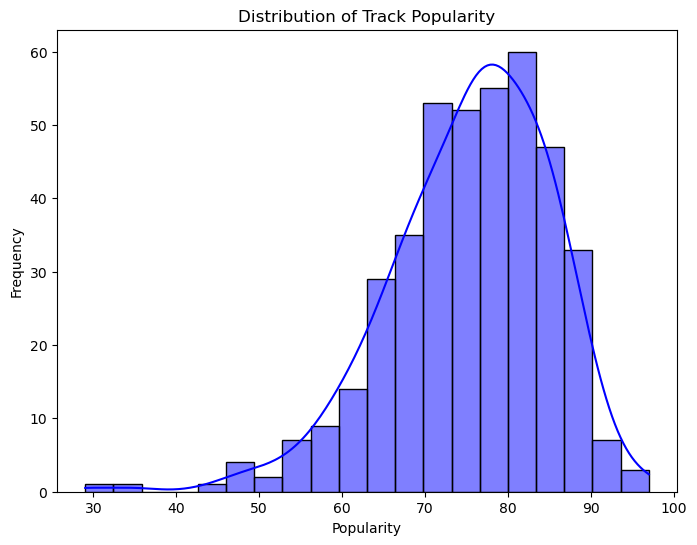

In [179]:
# 2. Distribution of popularity among the tracks (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

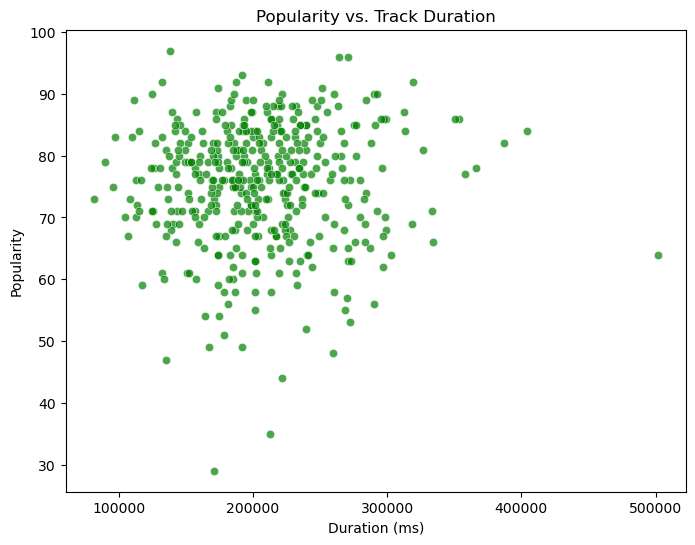

In [181]:
# 3. Relationship between popularity and duration of tracks (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.7, color='green')
plt.title('Popularity vs. Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


Track Count by Artist:
Artist
Drake             17
Eminem            11
Flo Rida          10
Ludacris          10
Timbaland         10
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64


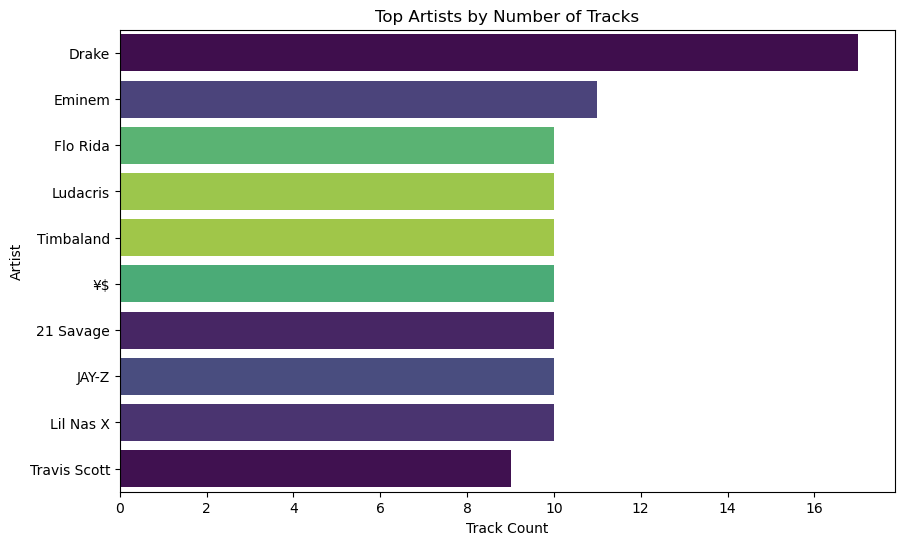

In [205]:
# 4. Artist with the highest number of tracks
artist_track_count = df['Artist'].value_counts()
print("\nTrack Count by Artist:")
print(artist_track_count)
plt.figure(figsize=(10, 6))
#sns.countplot(data=df, y='Artist', order=artist_track_count.index[:10], palette='viridis')
sns.countplot(data=df, y='Artist', order=artist_track_count.index[:10], palette='viridis', hue='Artist', legend=False)

plt.title('Top Artists by Number of Tracks')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()

In [185]:
# 5. Top 5 least popular tracks (Artist and Track Name)
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("\nTop 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [187]:
# 6. Among top 5 most popular artists, which has the highest average popularity
most_popular_artists = artist_track_count.index[:5]
top_artist_avg_popularity = df[df['Artist'].isin(most_popular_artists)].groupby('Artist')['Popularity'].mean()
print("\nAverage Popularity of Top 5 Artists:")
print(top_artist_avg_popularity)


Average Popularity of Top 5 Artists:
Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64


In [189]:
# 7. Most popular tracks for the top 5 most popular artists
most_popular_tracks = df[df['Artist'].isin(most_popular_artists)].sort_values(by='Popularity', ascending=False).groupby('Artist').head(1)
print("\nMost Popular Tracks by Top 5 Artists:")
print(most_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Most Popular Tracks by Top 5 Artists:
        Artist                               Track Name  Popularity
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
380  Timbaland                            The Way I Are          85
300   Flo Rida                       Low (feat. T-Pain)          84
371   Ludacris                             My Chick Bad          67


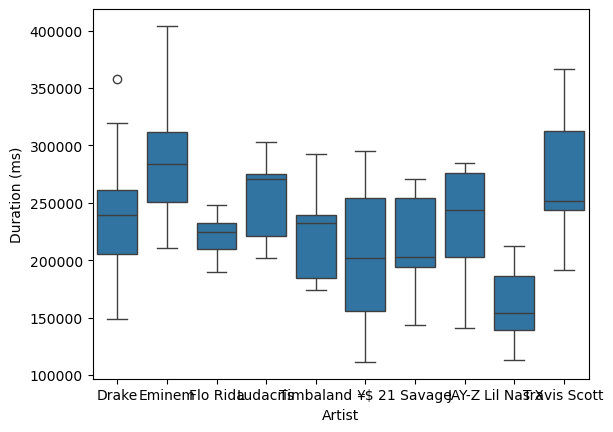

In [203]:
# 8. Visualize relationships between multiple numerical variables using a pair plot
sns.boxplot(data=df, x='Artist', y='Duration (ms)', order=artist_track_count.index[:10])

#sns.pairplot(df[['Popularity', 'Duration (ms)']], diag_kind='kde', palette='husl')
plt.show()

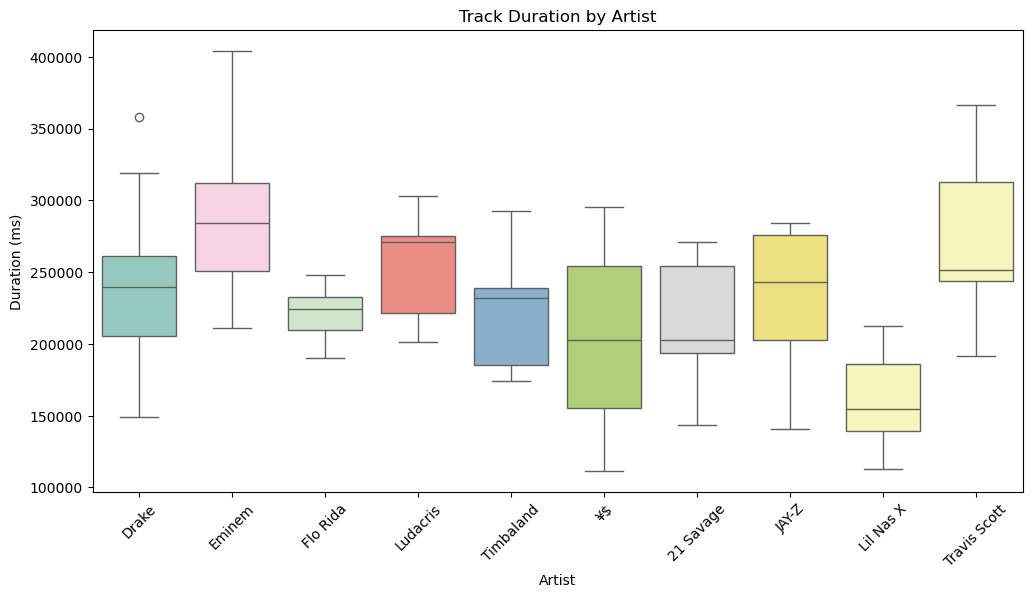

In [201]:
# 9. Does the duration of tracks vary significantly across different artists? (Box Plot)
plt.figure(figsize=(12, 6))
#sns.boxplot(data=df, x='Artist', y='Duration (ms)', order=artist_track_count.index[:10], palette='Set3')
sns.boxplot(data=df, x='Artist', y='Duration (ms)', order=artist_track_count.index[:10], palette='Set3', hue='Artist', legend=False)

plt.title('Track Duration by Artist')
plt.xticks(rotation=45)
plt.show()


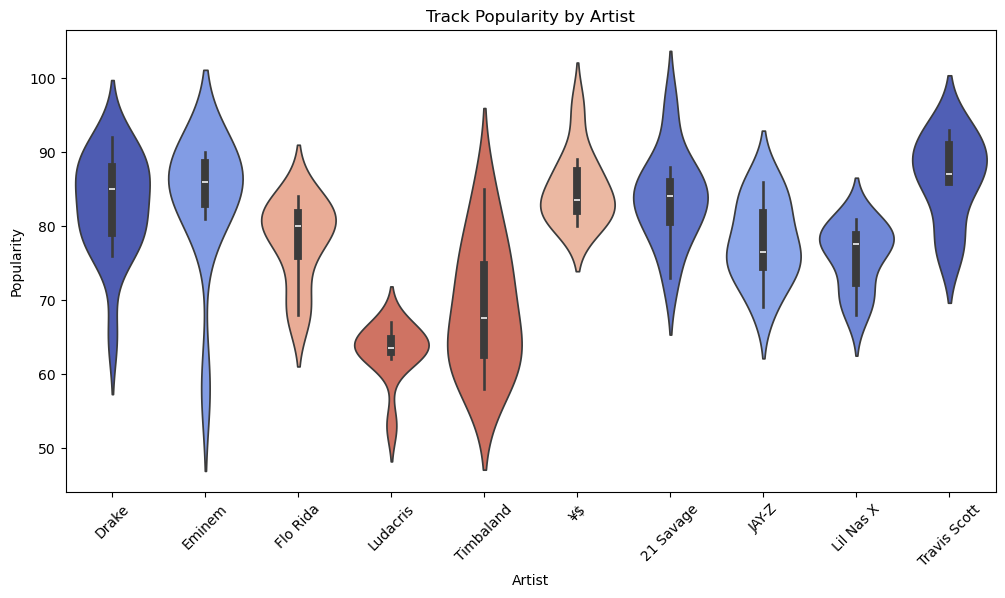

In [199]:
# 10. Distribution of track popularity for different artists (Swarm Plot)
plt.figure(figsize=(12, 6))
#sns.violinplot(data=df, x='Artist', y='Popularity', order=artist_track_count.index[:10], palette='coolwarm')
sns.violinplot(data=df, x='Artist', y='Popularity', order=artist_track_count.index[:10], palette='coolwarm', hue='Artist', legend=False)

plt.title('Track Popularity by Artist')
plt.xticks(rotation=45)
plt.show()
